In [1]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data3 = pd.read_csv('../../raw/서울시 주민등록인구 (연령별구별) 통계_2019_Q4.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
data3.set_index('자치구',inplace = True)
data3 = data3[['주민등록인구']]
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
df.reset_index(inplace=True)
df

,자치구,1인당 연소득,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,...,공원면적,공원율,1인당 공원 면적,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적,1인당 생활권 도시림 면적(산림수목),1인당 생활권 도시림 면적(공원녹지),주민등록인구
0,영등포구,2275.5,39.1,71.1,18.0,53.6,25.8,8.1,11.0,69.3,...,"3,050,378",12.43,7.6,2.558024e+06,2.525751e+06,6.957240,6.869465,5.186060,1.683405,400986
1,양천구,2077.8,42.1,61.7,16.4,80.3,24.7,6.9,10.4,68.5,...,"2,912,035",16.73,6.3,3.659173e+06,1.860690e+06,7.986583,4.061179,0.794295,3.266884,462285
2,마포구,1998.0,37.7,58.8,12.9,69.7,27.5,7.7,7.8,72.3,...,"4,440,002",18.62,11.5,3.977250e+06,3.956310e+06,10.633363,10.577379,3.961346,6.616033,385925
3,동작구,1910.8,44.4,65.7,16.4,78.5,20.7,4.9,9.0,66.6,...,"4,584,220",28.03,11.2,3.862343e+06,2.338377e+06,9.754303,5.905544,0.826446,5.079098,408912
4,금천구,1793.8,34.9,61.1,13.8,52.6,25.0,7.9,12.6,66.0,...,"2,206,213",16.94,8.8,3.126930e+06,4.139500e+05,13.431253,1.778059,1.399532,0.378528,251820
5,구로구,1898.2,33.8,59.3,9.8,59.5,23.5,5.6,6.8,64.5,...,"3,336,138",16.58,7.6,3.432140e+06,1.325089e+06,8.439744,3.258437,1.496934,1.761503,439371
6,관악구,1812.0,37.7,60.6,11.9,80.5,25.4,6.6,8.4,65.2,...,"10,976,868",37.12,21.2,1.583360e+07,5.399620e+05,31.661242,1.079721,0.564860,0.514861,517334
7,강서구,1838.1,39.9,57.5,19.4,69.8,28.7,5.7,9.9,66.4,...,"4,370,320",10.55,7.3,8.294106e+06,4.322172e+06,14.015144,7.303483,1.700300,5.603183,598273
8,중랑구,2294.1,35.1,61.3,21.1,66.4,24.4,7.4,11.4,61.4,...,"5,205,284",28.14,12.9,6.274698e+06,1.477730e+06,15.804687,3.722101,0.259189,3.462912,402024
9,종로구,2204.0,32.8,43.3,13.6,82.5,26.3,3.2,8.3,60.0,...,"11,556,112",48.33,71.4,1.327711e+07,2.501869e+06,87.759365,16.536911,0.639714,15.897197,161869


In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fm = mp.font_manager.FontManager()

plt.rcParams['font.family'] = 'Malgun Gothic'

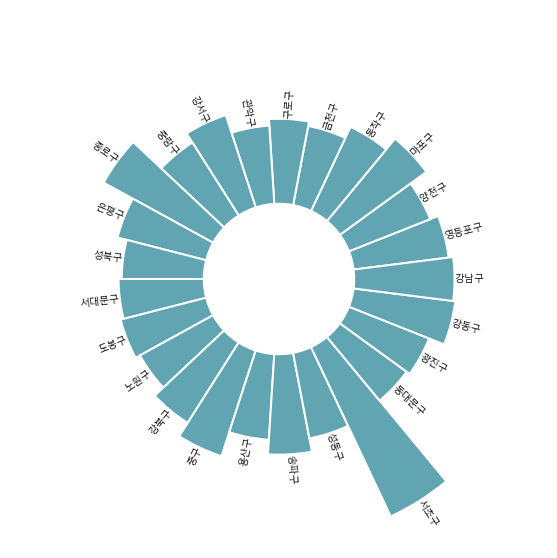

In [3]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15

# Compute max and min in the dataset
max = df['1인당 생활권 도시림 면적'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['1인당 생활권 도시림 면적'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 0

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["자치구"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

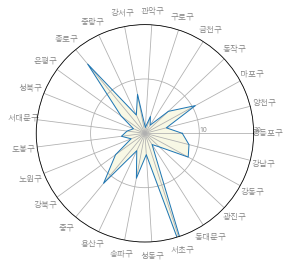

In [9]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#df1 = df['자치구','1인당 생활권 도시림 면적']

df1 = df[['자치구','1인당 생활권 도시림 면적']].T
df2 = df1.rename(columns=df1.iloc[0])
df3 = df2.drop(df2.index[0])
df3.reset_index(inplace=True)
df3['서초구'] -= 10
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df3)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,20)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'y', alpha=0.1)

# Show the graph
plt.show()